In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data.csv', sep=';')  # Replace ',' with the correct delimiter

/tmp/ipykernel_4053/2476156854.py:1: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', sep=';')  # Replace ',' with the correct delimiter


In [19]:
df.sample(5)

,region,oktmo,okato,year,type,code,latitude,longitude,zone_beginning,landmark_settlement,...,date_beginning,area_beginning,date_end,current_state,area_total,area_forest,area_fund_total,area_fund_forest,comment,zone
1393033,Ставропольский край,7000000,7000000,2023,Нелесные,к-846 (67406),44.138056,43.270000,Земли иных категорий,н.п. Лысогорская,...,08.08.2023,2,08.08.2023,ликвидирован 13.08.2023,11,0,0,0,NaN,Земли иных категорий
860321,Ставропольский край,7000000,7000000,2017,Нелесные,к-1826 (153619),45.523889,41.771111,Земли иных категорий,н.п. Птичье,...,14.09.2017,5,14.09.2017,ликвидирован 24.09.2017,12,0,0,0,NaN,Земли иных категорий
931118,Томская область,69000000,69000000,2018,Нелесные,к-9 (4220),56.331944,84.863056,Земли иных категорий,н.п. Барабинка,...,16.02.2018,4,16.02.2018,ликвидирован 26.02.2018,4,0,0,0,NaN,Земли иных категорий
398503,Амурская область,10000000,10000000,2007,Лесные,к-2272 (33611),50.741944,127.561111,Авиационный мониторинг,н.п. Грязнушка,...,30.04.2007,140,30.04.2007,ликвидирован 10.05.2007,160,144,0,0,NaN,NaN
1169893,Белгородская область,14000000,14000000,2021,Нелесные,к-59 (56630),51.296111,37.573056,Земли иных категорий,н.п. ГУБКИН,...,11.04.2021,2,11.04.2021,ликвидирован 16.04.2021,30,0,0,0,NaN,Земли иных категорий


In [20]:
df.columns

Index(['region', 'oktmo', 'okato', 'year', 'type', 'code', 'latitude',
       'longitude', 'zone_beginning', 'landmark_settlement',
       'landmark_azimuth', 'landmark_distance', 'forestry', 'date_beginning',
       'area_beginning', 'date_end', 'current_state', 'area_total',
       'area_forest', 'area_fund_total', 'area_fund_forest', 'comment',
       'zone'],
      dtype='object')

In [21]:
trash_cols = ['oktmo','okato','zone_beginning','code','landmark_settlement','landmark_azimuth','forestry','comment','zone']
df = df.drop(trash_cols,axis=1)
df.sample(5)

,region,year,type,latitude,longitude,landmark_distance,date_beginning,area_beginning,date_end,current_state,area_total,area_forest,area_fund_total,area_fund_forest
267532,Иркутская область,2005,Лесные,53.808889,103.691944,6.2,23.05.2005,152,23.05.2005,ликвидирован 2.06.2005,152,136,0,0
847153,Омская область,2017,Нелесные,54.011111,74.488889,4.4,28.05.2017,31,28.05.2017,ликвидирован 7.06.2017,31,0,31,0
627338,Республика Саха (Якутия),2011,Лесные,62.406944,115.878056,10.4,02.10.2011,45,02.10.2011,ликвидирован 12.10.2011,49,49,32,32
1416516,Краснодарский край,2024,Лесные,45.646111,38.263889,1.2,25.02.2024,3,27.02.2024,ликвидирован 3.03.2024,9,1,0,0
1050742,Карачаево-Черкесская Республика,2019,Нелесные,44.316111,42.311111,5.9,21.03.2019,36,21.03.2019,ликвидирован 26.03.2019,36,0,0,0


In [22]:
X = df.copy()

/tmp/ipykernel_4053/580677993.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='year', y='area_total', estimator=sum, ci=None)


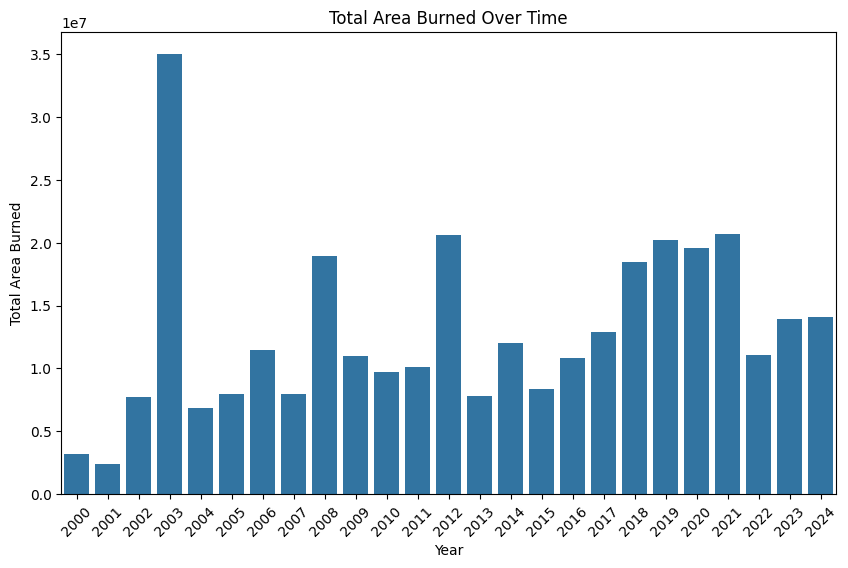

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='area_total', estimator=sum, ci=None)
plt.title('Total Area Burned Over Time')
plt.xlabel('Year')
plt.ylabel('Total Area Burned')
plt.xticks(rotation=45)

plt.show()

/tmp/ipykernel_4053/740923040.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_fires = df.resample('Y', on='date_beginning').size()


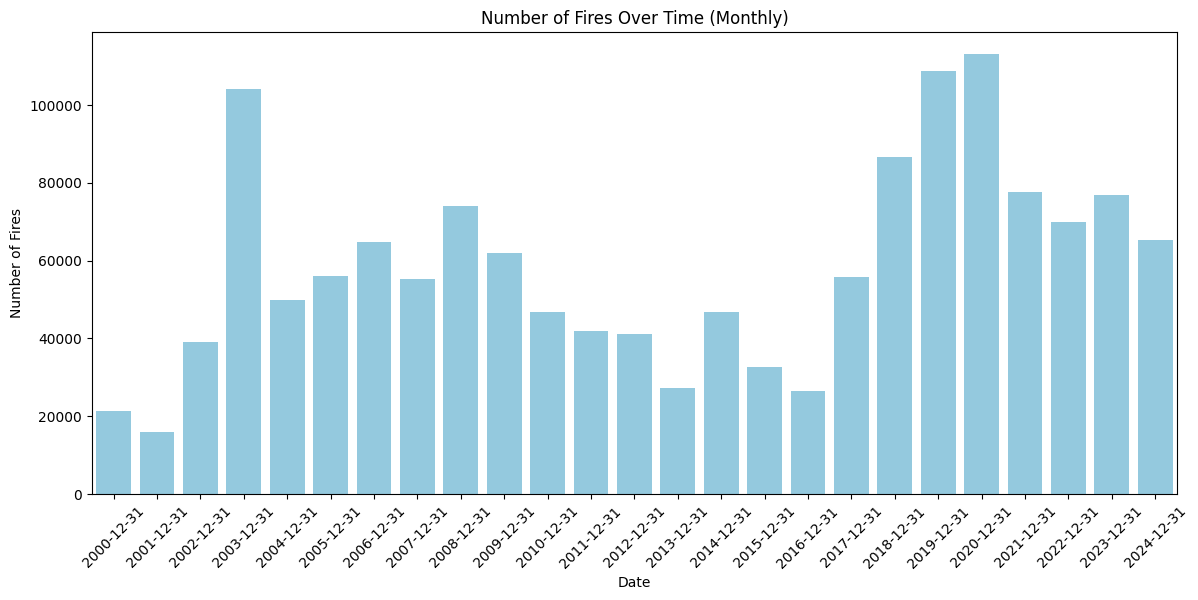

In [38]:
# Resample the data to monthly frequency and count the number of fires
monthly_fires = df.resample('Y', on='date_beginning').size()

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_fires.index, y=monthly_fires.values, color='skyblue')
plt.title('Number of Fires Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [24]:
df.sample(5)

,region,year,type,latitude,longitude,landmark_distance,date_beginning,area_beginning,date_end,current_state,area_total,area_forest,area_fund_total,area_fund_forest
394215,Усть-Ордынский Бурятский автономный округ,2007,Лесные,53.393056,104.196111,4.0,15.05.2007,27,15.05.2007,ликвидирован 25.05.2007,27,27,0,0
123905,Забайкальский край,2003,Нелесные,45.926111,42.853056,7.6,01.04.2003,36,01.04.2003,ликвидирован 4.04.2003,93,0,0,0
407180,Белгородская область,2008,Нелесные,50.931944,38.196944,3.4,29.08.2008,25,29.08.2008,ликвидирован 8.09.2008,27,0,0,0
261160,Ханты-Мансийский автономный округ — Югра,2005,Нелесные,60.958889,68.943889,3.2,08.05.2005,25,08.05.2005,ликвидирован 18.05.2005,25,0,0,0
207336,Тюменская область,2004,Лесные,55.801944,70.616111,4.7,30.04.2004,25,30.04.2004,ликвидирован 10.05.2004,12,1,0,0


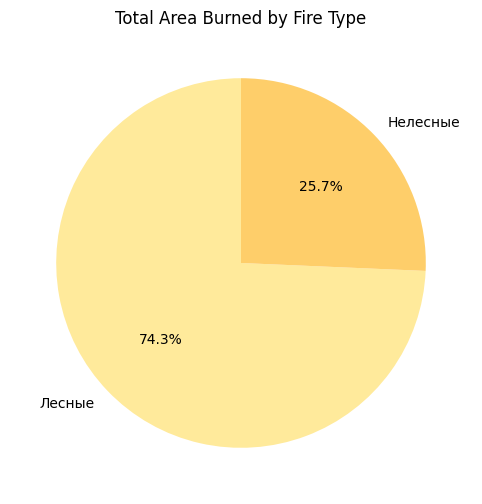

In [25]:
# Aggregate the data by fire type
type_totals = df.groupby('type')['area_total'].sum()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(type_totals, labels=type_totals.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrRd'))
plt.title('Total Area Burned by Fire Type')
plt.show()

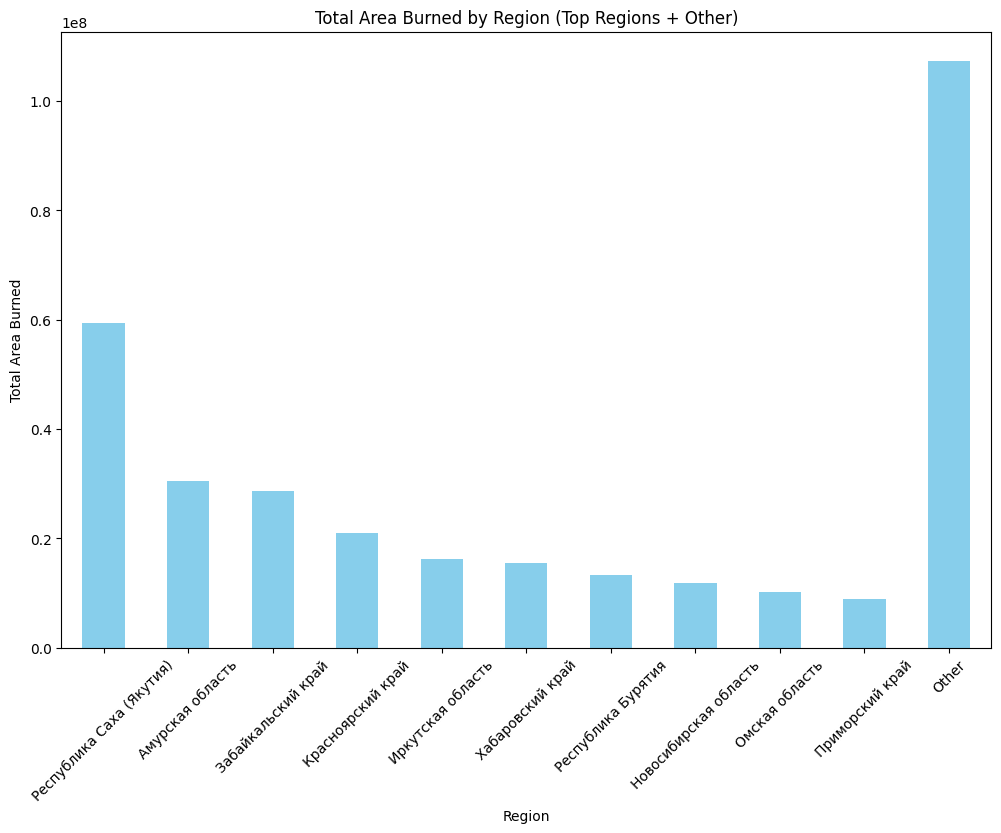

In [26]:
# Aggregate small regions into "Other"
region_totals = df.groupby('region')['area_total'].sum().sort_values(ascending=False)
threshold = region_totals.quantile(0.9)  # Keep top 10%, combine the rest into "Other"
region_totals_agg = region_totals[region_totals >= threshold]
region_totals_agg['Other'] = region_totals[region_totals < threshold].sum()

# Plot
plt.figure(figsize=(12, 8))
region_totals_agg.plot(kind='bar', color='skyblue')
plt.title('Total Area Burned by Region (Top Regions + Other)')
plt.xlabel('Region')
plt.ylabel('Total Area Burned')
plt.xticks(rotation=45)
plt.show()

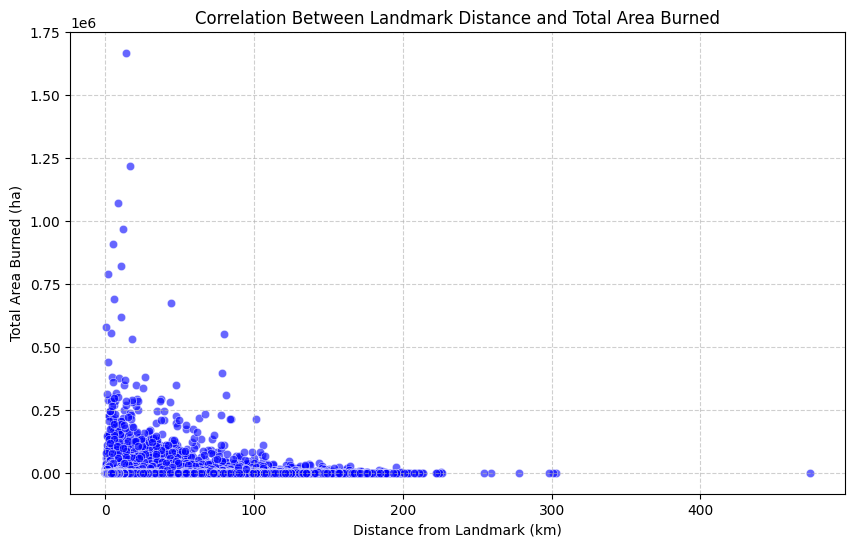

In [27]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='landmark_distance', y='area_total', alpha=0.6, color='blue')
plt.title('Correlation Between Landmark Distance and Total Area Burned')
plt.xlabel('Distance from Landmark (km)')
plt.ylabel('Total Area Burned (ha)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [28]:
df['date_beginning'] = pd.to_datetime(df['date_beginning'], format='%d.%m.%Y')

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to create a 'season' column
df['season'] = df['date_beginning'].dt.month.apply(get_season)

# Group by season and count fires
season_counts = df['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

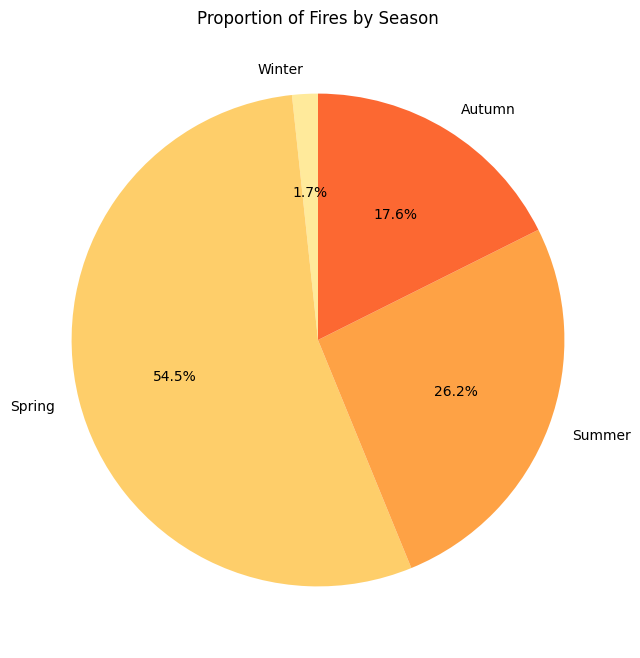

In [29]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlOrRd'))
plt.title('Proportion of Fires by Season')
plt.show()